# Lecture 23:  The Equilbrium and Kinetic Properties of a Non-Uniform System

## Reading and Reference

* Free Energy of a Nonuniform System. I. Interfacial Free Energy, Journal of chemical Physics, v28, n2, p258-267 (1958)
* Essential Mathematical Methods for Physicists, H. Weber and G. Arfken, Academic Press, 2003 (Chapter 5)
* Calculus of Variations, L. Elsgolc, Dover Publications, 2007 (Chapters 1 and 2)
* Thermodynamics in Materials Science, R. DeHoff, Taylor and Francis 2006.  (Chapters 8, 9 and 14)

## What to Learn?

* A Taylor's Series can be used to introduce correction terms to the bulk free energy.
* The energy functional can be minimized using variational principles
* The equations of motion can be developed from simple kinetic postulates
* Solutions to these equations show capillarity effects


## What to do?

* Develop a model for the thermodynamics of an inhomogeneous system.
* Derive the equation of motion for the phase seperation.
* Solve the kinetic equations and show the microstructural evolution.

### Introduction
----

Cahn and Hilliard’s paper from 1958 appears in Journal of Chemical Physics v. 28, n. 2, p. 258-267.  They generalize the free energy of a system with composition gradients. They do so using a Taylor expansion and develop a free energy functional and solve the resulting differential equation. Then a paper in 1961 titled "On Spinodal Decomposition" outlines the differential equation for the time rate of change of the composition in a spinodally decomposing system.

### An Example of a Spinodially Decomposing Structure
----

![](./images/Composite-Cropped.png)

### Lecture Outline
----

* The Free Energy of Mixing
* Beyond the Bulk:  Energy Correction Terms
* Minimizing the Total Energy
* The Surface Energy and Concentration Profile of a Non-Uniform System
* Spinodal Decomposition

### The Free Energy of Mixing
-----

The formation of a solution can be thought of as a sequence of steps:

* Compute the free energy of the unmixed state for an amount of pure A and pure B
* Allow both A and B to form a chemical solution
* Compute the energy change upon mixing and add this change to the energy of the initial state

### The Free Energy of Mixing
----

![Mixing](./images/Mixing.png)

To understand the energetics of a non-uniform system we need a model for a solution where the free energy of solution (e.g. Gibbs or Helmholz) is a function of composition.  This is most often represented as a free energy density (energy/volume).  We will start by describing the ideal solution where the mixing process results in an entropy change alone without any contribution from the enthalpy.

Recall from thermodynamics that energy is an extensive quantity and that the Gibbs free energy is defined as:

$$
G = H - TS
$$

If we want to describe the isothermal change between states 1 and 2, we can write the following:

$$
G_2 - G_1 = H_2 - H_1 - T(S_2-S_1)
$$

Resulting in:

$$
\Delta G_{1 \rightarrow 2} = \Delta H_{1 \rightarrow 2} - T \Delta S_{1 \rightarrow 2}
$$

We will used this formula to describe the change from unmixed (state 1) to mixed (state 2) in a thermodynamic solution.

### No Preference for Chemical Surroundings

* In an ideal solution the enthalpy change (or internal energy change) is zero.
* The entropy arises from mixing effects only.
* Stirling's Formula is used to approximate terms due to the energy change on mixing:

$$
\Delta G_{\mathrm{mix, \, id}} = RT(X_A \ln X_A + X_B \ln X_B)
$$

The free energy for an ideal solution can therefore be written:

\begin{align}
G_{\mathrm{ideal}} &= G_{\mathrm{unmixed}} + \Delta G_{\mathrm{mix, \, id}} \\ &= X_A G_A + X_B G_B + RT(X_A \ln X_A + X_B \ln X_B)
\end{align}

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

def idealSolution(GA, GB, XB, temperature):
    """
    Computes the free energy of solution for an ideal binary mixture.
    
    Parameters
    ----------
    GA : float
        The partial molar Gibbs free energy of pure A in Joules.
    GB : float
        The partial molar Gibbs free energy of pure B in Joules.
    XB : ndarray
        The mol fraction of component B as an array.
    temperature : float
        The temperature.
        
    Returns
    -------
    G : ndarray
        An array of the Gibbs free energy having the same shape as `XB`.
        
    Examples
    --------
    >>> XB = np.linspace(0.01,0.99,10)
    >>> G = idealSolution(0.0,0.0,XB,1.0)
    >>> array([ 0.53440324, -3.72037187, -4.76282566, -3.72037187,  0.53440324])
    """
    return (1.0-XB)*GA+XB*GB+8.314*temperature*((1-XB)*np.log(1-XB)+XB*np.log(XB))

def myfig(temperature):
    """
    This function produces a plot of the Gibbs free energy of mixing for an ideal solution.
    """
    GA = 1.0
    GB = 500.0
    
    XB = np.linspace(0.01,0.99,50)
    temperatureSpace = np.linspace(1.0,100.0,10)
    y = idealSolution(GA,GB,XB,temperature)
    greySolutionLines = [idealSolution(GA,GB,XB,greyT) for greyT in temperatureSpace]
    
    fig, axes = plt.subplots(figsize=(10,8))
    
    for greyLine in greySolutionLines:
        axes.plot(XB, greyLine, 'black', alpha=0.9)

    axes.plot(XB, y, 'r', label=r"$G_A X_A + G_B X_B + RT(X_A \ln X_A + X_B \ln X_B)$", linewidth=4)
    axes.legend()
    axes.grid(True, linestyle='dotted')
    axes.set_ylabel(r"$G_{soln}$")
    axes.set_xlabel(r"$X_B$")
    # Location for annotations can always be done by extents instead of absolute values.
    axes.annotate(r'$G_A$='+str(GA)+'\n'+r'$G_B$='+str(GB),xy=(0,200), size='large')
    plt.show()
    return

In [2]:
interact(myfig, temperature=(1.0,100.0,1.0));

interactive(children=(FloatSlider(value=50.0, description=u'temperature', min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

### Correcting the Ideal Solution for Local Chemical Effects
----

* In general, the free energy of solution includes both enthalpic and entropic terms
* The previous treatment of the ideal solution neglects any contribution from the enthalpy.
* Before mixing - there are only A-A and B-B bonds and NO A-B bonds.
* After mixing the number of A-B bonds is estimated from statistical and structural considerations to produce a model of the excess enthalpy

As outlined above, it is possible to have both enthalpy and entropy of mixing effects when forming a solution.  A more general approach would include the possibility that there may be enthalpy changes upon mixing.  Two types of arguments can be made:  mathematical and physical.  

A simple mathematical argument for the enthalpy of solution is based on the fact that the functions of mixing have the property that their values must pass through zero at the pure end member compositions.  A simple function that captures this requirement would have a form:

$$
\Delta H_{mix} = \Omega X_A X_B
$$

where $\Omega$ is a single adjustable parameter.  As is pointed out by DeHoff, simpler functions than this are not possible.  A physical argument for this form is known as the _quasichemical model_ for solutions.  A summary of the quasichemical model and the probability argument for finding like and unlike bonds in a random solution is given by DeHoff (and other texts on thermodynamics), but the important points are as follows:

The heat of mixing of a non-ideal solution, called the _regular solution_ is proportional:

* to the number of unlike bonds, and
* includes a parameter that scales with the difference in energy between like and unlike bonds.

<img src="./images/Enthalpy-Nonzero.png",width=1200>

$$
\Delta H_{\mathrm{mix}} = \Omega(\epsilon)X_A X_B
$$

### DIY:  Exploration of Bond Types
----

Simulate three different types of solutions:  clustered, random and ordered.  Compute the fraction of bond types as a function of mole fraction solute (e.g. $X_B$) for each type.  Justify the form of the enthalpy of mixing based on your calculations.

The regular solution model is then writte as:

\begin{align}
G_{\mathrm{regular}} = X_A G_A + X_B G_B &+ \Omega(\epsilon)X_A X_B \\ &+ RT(X_A \ln X_A + X_B \ln X_B)
\end{align}

In [ ]:
def regularSolution(GA, GB, XB, omega, temperature):
    return omega*(1.0-XB)*XB+(1.0-XB)*GA+XB*GB+8.314*temperature*((1.0-XB)*np.log(1.0-XB)+XB*np.log(XB))

def myfig2(omega, temperature):
    """
    This function produces a plot of the Gibbs free energy of mixing for a regular solution.
    """
    GA = 1.0
    GB = 1.0
    
    XB = np.linspace(0.01,0.99,50)
    temperatureSpace = np.linspace(1.0,200.0,10)
    y = regularSolution(GA, GB, XB, omega, temperature)
    greySolutionLines = [regularSolution(GA, GB, XB, omega, greyT) for greyT in temperatureSpace]
    
    fig2, axes2 = plt.subplots(figsize=(14,9))
    
    for greyLine in greySolutionLines:
        axes2.plot(XB, greyLine, 'black', alpha=0.9)

    axes2.plot(XB, y, 'r', label=r"$G_{soln}$", linewidth=4)

    # Location for annotations can always be done by extents instead of absolute values.
    axes2.annotate('GA='+str(GA)+'\n'+'GB='+str(GB),xy=(0,400), fontsize=20)
    
    axes2.set_ylabel(r"$G_{soln}$", fontsize=15)
    axes2.set_xlabel(r"$X_B$", fontsize=15)
    axes2.legend(loc="upper right", fontsize=15)
    axes2.xaxis.set_tick_params(labelsize=15)
    axes2.yaxis.set_tick_params(labelsize=15)
    
    plt.show()
    return

In [ ]:
interact(myfig2, omega=(0.0,5000.0,1.0), temperature=(1.0,200.0,1.0));

### A Small Simplification
----

Although the regular solution can approximate more kinds of chemical solutions, all the effects we wish to show are produced by a simple function that replaces the regular solution model:


$$
f(\phi) = W \phi^2 (1-\phi)^2
$$

I switch to $\phi$ as a reminder of this simplification.  A plot of this function and the regular solution are shown side-by-side below:

In [ ]:
def regularSolution(GA, GB, XB, omega, temperature):
    return omega*(1.0-XB)*XB+(1.0-XB)*GA+XB*GB+8.314*temperature*((1-XB)*np.log(1-XB)+XB*np.log(XB))

def simplifiedSolution(XB, W):
    return (1.0-XB)**2*XB**2*W

def myfig3(omega, W, temperature):
    """
    This function ...
    """
    GA = 1.0
    GB = 1.0
    
    XB = np.linspace(0.01,0.99,50)
    
    temperatureSpace = np.linspace(1.0,100.0,10)
    y1 = regularSolution(GA, GB, XB, omega, temperature)
    greySolutionLines = [regularSolution(GA, GB, XB, omega, greyT) for greyT in temperatureSpace]
    
    wSpace = np.linspace(0.01,100.0,10)
    y2 = simplifiedSolution(XB, W)
    greyWLines = [simplifiedSolution(XB, greyW) for greyW in wSpace]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    plt.tight_layout(pad=5.0)
    
    #for greyLine in greyMagLines:
    #    axes[0].plot(eta, greyLine, 'grey', alpha=0.3)
    #for greyLine in greyPhiLines:
    #    axes[1].plot(eta, greyLine, 'grey', alpha=0.3)
    #axes[0].set_ylim(0,4)
    #axes[0].plot(eta, y1, 'r', label=r"$MF(\eta,\xi)$")
    #axes[1].set_ylim(0,180)
    #axes[1].plot(eta, y2, 'b', label=r"$\phi(\eta,\xi)$")
    
    for greyLine in greySolutionLines:
        axes[0].plot(XB, greyLine, 'black', alpha=0.9)
    axes[0].plot(XB, y1, 'r', label=r"Regular Solution", linewidth=4)
    axes[0].annotate('GA='+str(GA)+'\n'+'GB='+str(GB),xy=(0,40), fontsize=15)

    for greyLine in greyWLines:
        axes[1].plot(XB, greyLine, 'black', alpha=0.9)
    axes[1].plot(XB, y2, 'g', label=r"$W \phi^2 (1-\phi)^2$", linewidth=4)
    axes[1].set_ylim(0.0,4.0)

    #axes.plot(XB, y, 'r', label=r"$G_{soln}$")
    #axes.legend()
    #axes.grid(True, linestyle='dotted')
    #axes.set_ylim(-600,200)
    #axes.set_ylabel(r"$G_{soln}$")
    #axes.set_xlabel(r"$X_B$")
    
    for ax in axes:
        ax.legend(loc="upper right", fontsize=15)
        ax.set_ylabel(r"$G_{soln}$", fontsize=20)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)

    axes[0].set_xlabel(r"$X_B$", fontsize=20)
    axes[1].set_xlabel(r"$\phi$", fontsize=20)


    plt.show()
    return

In [ ]:
interact(myfig3, omega=(0.0,1000.0,1.0), W=(0.0,100.0,1.0), temperature=(1.0,100.0,1.0));

### Beyond the Bulk:  Energy Correction Terms
----

* Diffusive length scales are on the order of microns.
* Precipitation and phase seperation length scales are on the order of nanometers.
* At nanometer length scales the gradient energy becomes comparable to the bulk free energy and must be accounted for.

Cahn and Hilliard's insight was that a non-uniform system's total energy should depend on the average values of the order parameter as well as the spatial gradients within the order parameter.  One viewpoint is that these gradient terms are "correction terms" needed when the order parameter gradients are very large.  

Practically, this insight impacts the way scientists think of interfaces and phase transitions in areas primarily related to chemical solutions, magnetic domains and ferroelectric materials.  The development of a free energy functional that includes bulk and gradient terms permits a unified treatment of the bulk and interface regions in a material.  This, in turn, allows new understanding of both non-uniform and heterogenerous systems.  To understand the origin of the energy correction terms, the series expansion and the independence of the order parameter and its gradients are first discussed.

### Review:  A Taylor Series Expansion
----

In multiple independent variables the Taylor's Series is:

\begin{align}
f(x,y) & = f(a,b) + (x-a)\frac{\partial f}{\partial x} + (x-b)\frac{\partial f}{\partial y}\\
& + \frac{1}{2!} \left[ (x-a)^2 \frac{\partial^2 f}{\partial x^2} + 2(x-a)(y-b) \frac{\partial^2 f}{\partial x \partial y} + (y-b)^2 \frac{\partial^2 f}{\partial y^2} \right] \\
& + \; ...
\end{align}

### The Independence of $\phi$, $\nabla \phi$ and $\nabla^2 \phi$
----

* The total energy of the system can depend on the concentration and local variations
* This phase space can be sampled by permitting $\phi(x)$ and its gradients to vary independently
* Consider that the average composition of a system is independent of the wavelengths of concentration variations.

The Taylor's series above is written assuming that the variables $x$ and $y$ are independent.  More than two independent variables can be treated similarly.  When we write the free energy of a non-uniform system we will postulate that the concentration and its gradients are independent quantities.  Help establish that this is a reasonable assumption, consider the following example.

An intuitive argument is that in a conservative field a particle's instantaneous energy can be determined by its position and velocity.  It is possible to choose a particle's potential energy and kinetic energy by setting the position and velocity at an instant in time.  These two quantities can be chosen independently to return any desired value of the system's total energy.  In an effort to extend this analogy to chemical systems, below I plot three functions.  The first is the average composition.  The other two are functions that have the same average, but have different gradients and second derivatives.

In [ ]:
def phiPlots():
    """
    This function's docstring explaining the function.
    """
    t = np.linspace(0,10,100)
    y1 = np.cos(t)
    y2 = np.cos(2*t)
    y3 = 0*t
    fig, axes = plt.subplots(figsize=(14,9))
    axes.plot(t, y3, 'g--', label="Average")
    axes.plot(t, y1, 'r', label="Profile 1")
    axes.plot(t, y2, 'b', label="Profile 2")
    axes.set_xlabel(r"$t$", fontsize=15)
    axes.set_ylabel(r"$c(x)$", fontsize=15)
    axes.legend(fontsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.yaxis.set_tick_params(labelsize=15)
    plt.show()
    return

In [ ]:
phiPlots()

### The Free Energy of Our System
----

If the temperature and pressure are our process variables, then we can use the Gibbs free energy per unit volume.  The total energy of the system is then found by integrating the Gibbs free energy density over the volume of the system as in the integral below.  Furthermore we assume that the order parameter (the composition proxy) and powers of the derivatives of order parameter all contribute to the free energy and are independent:

$$
F = \int_V f_v(\phi, \nabla \phi, \nabla^2 \phi, ...) \delta V
$$

It is possible to expand the integrand explicitly in powers of the independent parameters using a Taylor's series formalism (DeHoff explains this in Chapter 14 of his thermodynamics text, also), in a shorthand notation we write an equivalent statement:

$$
f_v = f_v^0 + L \nabla \phi + K_1 \nabla^2 \phi + K_2 (\nabla \phi)^2 + \; ...
$$

with

$$
L = \left( \frac{\partial f_v}{\partial (\nabla \phi)} \right)
$$

and **other similar terms** as per the Taylor's Series expansion above treating $\phi$ and all higher order derivatives as independent parameters in the free energy space.  These extra terms can be viewed as "correction" terms in the approximation of the free energy density in the vicinity of the average alloy composition.

### The Free Energy Functional
----

Three arguments and manipulations are made to arrive at the desired functional:

1. The sign of the gradient should not affect the total energy;
1. The energy should be invariant with respect to inversion symmetry;
1. The energy should be invariant with respect to four fold rotations about a principal axis.

$$
F = \int_V f_v + K (\nabla \phi)^2 \delta V
$$

We keep the lowest order, nonzero correction term in the gradient of the order parameter.  The above assumptions can be relaxed for different applications.  We can now proceed to find the function $\phi(x)$ that minimizes the integral.

### A Result from the Calculus of Variations
----

The main purpose of the CoV is to find the function $y$ minimizing (or making extreme) the integral:

$$
I(y) = \int_{x_0}^{x_1} F(x,y',y'') dx
$$

* One application is a minimum path problem:  a straight line connects two points in the plane.
* One important result is the Euler-Lagrange equation:

$$
\frac{\partial F}{\partial y} - \frac{d}{dx} \frac{\partial F}{\partial y'} = 0
$$

A functional is a "function of functions".  To find the function that makes the integral stationary (most often a minimum) we will need to apply the Euler Lagrange result from the calculus of variations. 

If you examine a series of nearby functions to the extreme function, $y(x)$, it can be demonstrated that the Euler-Lagrange equation is the only possibility for making $I(y)$ stationary.

Using the functional that includes the gradient correction term, we can write a differential equation where the solution is the minimizing function.

### DIY:  Use The Euler Lagrange Equation
---

Using a path length integral, demonstrate that the shortest distance between two points on the plane is a straight line.

### The PDE to Determine Profiles and Kinetic Evolution of a Non-Uniform System
----

$$
F(\phi,\phi') = W \phi^2 (1-\phi)^2 + \epsilon (\nabla \phi)^2
$$

Applying the Euler-Lagrange equation to our functional we get:

\begin{align}
\frac{\delta F}{\delta \phi} & = \frac{\partial F}{\partial \phi} - \frac{d}{dx} \frac{\partial F}{\partial \nabla \phi} = 0 \\ &= 2 W \phi \left(\phi - 1\right) \left(2 \phi - 1\right) - 2 \epsilon \nabla^2  \phi = 0
\end{align}

recall that $\phi(x,t)$ and this equation implies equilibrium.

In [ ]:
import sympy as sp
sp.init_session(quiet=True)
phi, W, epsilon = symbols('phi W epsilon', real=true)

functionalForm = W*phi(x)**2*(1-phi(x))**2 + epsilon*(phi(x).diff(x))**2
ele = sp.euler_equations(functionalForm, phi(x), x)
ele

In [ ]:
delFdelPhi = (ele[0].lhs).simplify()
delFdelPhi

In [ ]:
firstTermsFactored = sp.factor(4*W*phi**3-6*W*phi**2+2*W*phi)
firstTermsFactored

### Solving the ODE Explicitly
----

The use of an integrating factor results in the ODE:

$$
\frac{d \phi}{d x} \frac{1}{\phi(1-\phi)} - \sqrt{\frac{W}{\epsilon}} = 0
$$

In [ ]:
import sympy as sp
sp.init_session(quiet=True)
sp.dsolve(sp.diff(f(x),x)*(1/(f(x)*(1-f(x))))-k,f(x),hint='lie_group')

and after some exciting manipulation, a solution is:

$$
\phi(x) = \frac{1}{2}\left(1 + \tanh{\sqrt{\frac{W}{\epsilon}}\frac{x}{2}}\right)
$$

Contributions from the bulk free energy (through W) and the gradient correction term (through $\epsilon$) shape the profile of the concentration, order, etc. at the interface.

In [ ]:
def phiSolution(W, epsilon):
    """
    This function's docstring explaining the function.
    """
    x = np.linspace(-10,10,100)
    y = 0.5*(1.0 + np.tanh((np.sqrt(W/epsilon))*(x/2.0)))

    fig, axes = plt.subplots(figsize=(14,9))
    axes.plot(x, y, 'r', label=r"$\phi(x)$")
    axes.set_xlabel(r"$x$", fontsize=20)
    axes.set_ylabel(r"$\phi(x)$", fontsize=20)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.legend(fontsize=20)
    plt.show()
    return

In [ ]:
interact(phiSolution, W=(0.01,10,0.1), epsilon=(0.01,10,0.1));

### Solving the PDE Using Relaxation
----

With the bulk free energy and the gradient energy contributions conceptually justified it is now necessary to identify the equations of motion.  In the non conserved case:

$$
\frac{\partial \phi}{\partial t} = -M \frac{\delta F}{\delta \phi}
$$

and for a conserved order parameter the equations of motion are derived from:

$$
\frac{\partial \phi}{\partial t} = \nabla \cdot D \nabla \frac{\delta F}{\delta \phi}
$$

There are other choices, but these are the simplest choices that guarantee a free energy decrease with time.

When writing the equations of motion - things can get messy.  It is better therefore to write the leading term on the LHS as $A(\phi)$.  This gives:

$$
\frac{\delta F}{\delta \phi} = A(\phi) - \epsilon \frac{d^{2}}{d x^{2}}  \phi{\left (x \right )}
$$


with

$$
\nabla \cdot D \nabla \frac{\delta F}{\delta \phi} = \nabla \cdot D \left( \frac{\partial A}{\partial \phi} \nabla \phi(x) - \epsilon \frac{d^{3}}{d x^{3}} \phi(x) \right)
$$

By distributing the divergence and diffusion coefficient, we arrive at:

$$
\frac{\partial \phi}{\partial t} = \nabla \cdot D \frac{\partial A}{\partial \phi} \nabla \phi(x) - D \epsilon \nabla^4 \phi(x)
$$

### Plots of the Progress of a Spinodal Decomposition Simulation

![](./images/Composite-Cropped.png)

In [1]:
%%HTML
<video width="600" height="600" controls> <source src="./images/Cahn-Hilliard.mp4" type="video/mp4">
</video>

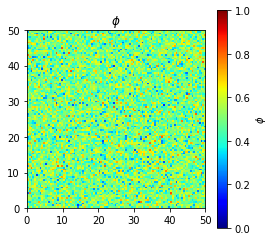

In [6]:
from fipy import *
from IPython.display import clear_output
import time
nx = ny = 100

mesh = Grid2D(nx=nx, ny=ny, dx=0.5, dy=0.5)
phi = CellVariable(name=r"$\phi$", mesh=mesh)
psi = CellVariable(name=r"$\psi$", mesh=mesh)

noise = GaussianNoiseVariable(mesh=mesh,mean=0.5,variance=0.01).value
phi[:] = noise

viewer = Viewer(vars=phi)

D = a = epsilon = 1.
dfdphi = a**2 * 2 * phi * (1 - phi) * (1 - 2 * phi)
dfdphi_ = a**2 * 2 * (1 - phi) * (1 - 2 * phi)
d2fdphi2 = a**2 * 2 * (1 - 6 * phi * (1 - phi))
eq1 = (TransientTerm(var=phi) == DiffusionTerm(coeff=D, var=psi))
eq2 = (ImplicitSourceTerm(coeff=1., var=psi) 
       == ImplicitSourceTerm(coeff=-d2fdphi2, var=phi) - d2fdphi2 * phi + dfdphi 
       - DiffusionTerm(coeff=epsilon**2, var=phi))
eq3 = (ImplicitSourceTerm(coeff=1., var=psi) 
       == ImplicitSourceTerm(coeff=dfdphi_, var=phi)
       - DiffusionTerm(coeff=epsilon**2, var=phi))

eq = eq1 & eq3

dexp = -3
elapsed = 0.
duration = 100.0

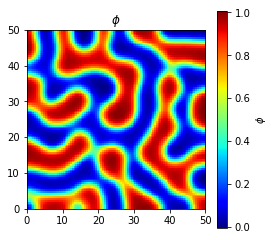

In [ ]:
# Run the model.
while elapsed < duration:
    dt = min(100, numerix.exp(dexp))
    elapsed += dt
    dexp += 0.01
    eq.solve(dt=dt)
    viewer.plot()
    clear_output(wait=True)
    display(viewer)

### Summary
---

* When the enthalpy of mixing is non-zero phase seperation may occur.

* A correction term to the energy is found by a Taylor's Series expansion.

* The equilibrium profile of the order parameter is found by making the free energy an extreme value.

* This profile is determined by BOTH contributions from the bulk free energy and a "non-classical" gradient energy.

* A kinetic **postulate** can be used to solve the differential equation to gain insight into the kinetic evolution of phase seperating systems.

### Homework
----

Redo the derivation for a non-conserved order parameter and solve the resulting kinetic equations.  Comment on the differences between the two simulations.  Your submission should include written text, equations, visualizations, and numerical results and analysis.  

July 26, 2018